In [ ]:
#importing the libraries
import numpy as np #alloq to make arrays
import matplotlib.pyplot as plt
#visualize results on charts
import pandas as pd # import dataset and manage easily


In [ ]:
#importing test set later on iporting the training set-only importing training set,
#data preprocessig

In [ ]:
#importing training dataset
dataset_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set=dataset_train.iloc[:,1:2].values
training_set

#need to make into numpy arrays because only numpy arrays can be input values in keras

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


In [ ]:
#creating a data structure with 60 timestepd and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [ ]:
#reshaping  to add dimension in numpy array
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
#building the RNN stacked lstm with dropout regulization to prevent overfitting

In [ ]:
#importing the kears libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#INITIALIZING THE RNN
regressor=Sequential() #reps sequence of layers,predicting continuos values(so it is a regression)

In [ ]:
from keras.layers import Dense,SimpleRNN
#adding the first LSTM and some dropout regulisation
#dropout to prevent overfitting
regressor.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
from keras.optimizers import RMSprop
from keras.callbacks import Callback
regressor.add(SimpleRNN(units=50,return_sequences=False,input_shape=(X_train.shape[1],1)))
regressor.add(Dense(32,activation="relu"))
regressor.add(Dense(1))
regressor.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['mse'])

In [ ]:
#fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 4s 42ms/step - loss: 0.0440 - mse: 0.0440
Epoch 2/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0177 - mse: 0.0177
Epoch 3/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0097 - mse: 0.0097
Epoch 4/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0075 - mse: 0.0075
Epoch 5/20
38/38 [==============================] - 1s 39ms/step - loss: 0.0071 - mse: 0.0071
Epoch 6/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0054 - mse: 0.0054
Epoch 7/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0052 - mse: 0.0052
Epoch 8/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0036 - mse: 0.0036
Epoch 9/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0036 - mse: 0.0036
Epoch 10/20
38/38 [==============================] - 2s 55ms/step - loss: 0.0030 - mse: 0.0030
Epoch 11/20
38/38 [==============================] - 1s 37m

In [ ]:
#prediction and visualization
#getting the real stock price of 2018
dataset_test=pd.read_csv("/content/Google_Stock_Price_Train.csv")
real_stock_price=dataset_test.iloc[:,1:2].values


In [ ]:
#getting the predicted stock price of 2018
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 475ms/step


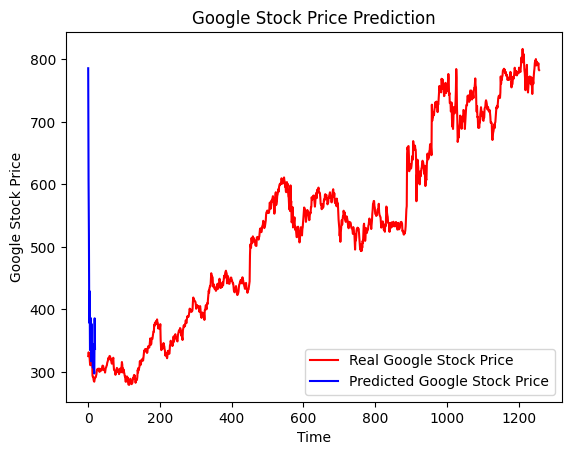

In [ ]:
#visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#LSTM
from keras.layers import LSTM
from keras.layers import Dense, Activation, SimpleRNN



In [ ]:
from keras.layers import Input

In [ ]:
model1= Sequential()
model1.add(LSTM(units=10, input_shape=(X_train.shape[1],1)))
model1.add(Dense(1))
model1.add(Activation('softmax'))

In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10)                480       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [ ]:
model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 27ms/step - loss: 0.3296 - mse: 0.3296
Epoch 2/10
38/38 [==============================] - 1s 26ms/step - loss: 0.3296 - mse: 0.3296
Epoch 3/10
38/38 [==============================] - 1s 27ms/step - loss: 0.3296 - mse: 0.3296
Epoch 4/10
38/38 [==============================] - 1s 27ms/step - loss: 0.3296 - mse: 0.3296
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.3296 - mse: 0.3296
Epoch 6/10
38/38 [==============================] - 1s 26ms/step - loss: 0.3296 - mse: 0.3296
Epoch 7/10
38/38 [==============================] - 1s 24ms/step - loss: 0.3296 - mse: 0.3296
Epoch 8/10
38/38 [==============================] - 1s 38ms/step - loss: 0.3296 - mse: 0.3296
Epoch 9/10
38/38 [==============================] - 2s 57ms/step - loss: 0.3296 - mse: 0.3296
Epoch 10/10
38/38 [==============================] - 1s 25ms/step - loss: 0.3296 - mse: 0.3296


#stacked LSTM

In [ ]:
time_steps=60
model2=Sequential()
model2.add(Input(shape=(time_steps,1)))
model2.add(LSTM(48,return_sequences=True))
model2.add(Dropout(0.4))
model2.add(LSTM(48,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(48))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='relu'))
model2.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 60, 48)            9600      
                                                                 
 dropout_7 (Dropout)         (None, 60, 48)            0         
                                                                 
 lstm_12 (LSTM)              (None, 60, 48)            18624     
                                                                 
 dropout_8 (Dropout)         (None, 60, 48)            0         
                                                                 
 lstm_13 (LSTM)              (None, 48)                18624     
                                                                 
 dropout_9 (Dropout)         (None, 48)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 11s 126ms/step - loss: 0.0400 - mse: 0.0400
Epoch 2/10
38/38 [==============================] - 4s 94ms/step - loss: 0.0056 - mse: 0.0056
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0055 - mse: 0.0055
Epoch 4/10
38/38 [==============================] - 5s 125ms/step - loss: 0.0046 - mse: 0.0046
Epoch 5/10
38/38 [==============================] - 4s 94ms/step - loss: 0.0042 - mse: 0.0042
Epoch 6/10
38/38 [==============================] - 4s 93ms/step - loss: 0.0046 - mse: 0.0046
Epoch 7/10
38/38 [==============================] - 4s 102ms/step - loss: 0.0044 - mse: 0.0044
Epoch 8/10
38/38 [==============================] - 4s 117ms/step - loss: 0.0043 - mse: 0.0043
Epoch 9/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0039 - mse: 0.0039
Epoch 10/10
38/38 [==============================] - 5s 120ms/step - loss: 0.0042 - mse: 0.0042


In [ ]:
#GRU

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional,BatchNormalization